In [1]:
import pandas
import cv2
import networkx
from matplotlib import pyplot
from Bio import SeqIO, AlignIO

In [2]:
data_dir = "../../../data"
big_one = "homo_sapiens_ENSG00000165553"
small_one = "carlito_syrichta_ENSTSYG00000026821"
dataset = "orthologs_neuroglobin"
algorithm = "Structural Similarity Index Measure"

In [3]:
df = pandas.read_csv(f"{data_dir}/trees/full/{dataset}/{algorithm}.map")

In [4]:
df.head()

,img1,img2,score,start_col,start_line,stop_col,stop_line,max_size
0,homo_sapiens_ENSG00000165553.png,homo_sapiens_ENSG00000165553.png,1.0,0,0,11,456,456
1,homo_sapiens_ENSG00000165553.png,homo_sapiens_ENSG00000165553.png,1.0,5,0,16,456,456
2,homo_sapiens_ENSG00000165553.png,homo_sapiens_ENSG00000165553.png,1.0,10,0,21,456,456
3,homo_sapiens_ENSG00000165553.png,homo_sapiens_ENSG00000165553.png,1.0,15,0,26,456,456
4,homo_sapiens_ENSG00000165553.png,homo_sapiens_ENSG00000165553.png,1.0,20,0,31,456,456


In [5]:
df_filter_test = df[(df.img1 == f"{big_one}.png") & (df.img2 == f"{small_one}.png")]
df_filter_test = df_filter_test.reset_index(drop=True).reset_index()

In [6]:
df_filter_test

,index,img1,img2,score,start_col,start_line,stop_col,stop_line,max_size
0,0,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.022525,0,0,11,417,456
1,1,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.029377,20,15,31,432,456
2,2,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.042102,40,30,51,447,456
3,3,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.041085,45,30,56,447,456
4,4,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.078045,20,0,31,417,456
...,...,...,...,...,...,...,...,...,...
77,77,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.024133,385,0,396,417,456
78,78,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.046965,420,30,431,447,456
79,79,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.056324,410,15,421,432,456
80,80,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.030445,405,5,416,422,456


In [7]:
g = networkx.DiGraph()

In [8]:
for item in df_filter_test.iterrows():
    g.add_edge(
        str(item[1][0])+"_"+str(item[1].start_col),
        str(item[1][0])+"_"+str(item[1].stop_col), score=item[1].score)

In [9]:
g.size()

82

In [10]:
for item in df_filter_test.iterrows():
    for inneritem in df_filter_test[item[0]:].iterrows():
        if ((item[1].start_col < inneritem[1].start_col) and (item[1].stop_col >= inneritem[1].start_col)):
            g.add_edge(
                str(item[1][0])+"_"+str(item[1].stop_col),
                str(inneritem[1][0])+"_"+str(inneritem[1].start_col), score=0)
        elif (item[1].stop_col < inneritem[1].start_col):  ## with gap
            g.add_edge(
                str(item[1][0])+"_"+str(item[1].stop_col),
                str(inneritem[1][0])+"_"+str(inneritem[1].start_col), score=0)            

In [11]:
g.size()

3305

In [12]:
networkx.dag_longest_path_length(g, weight="score", default_weight=0)

2.426598866000001

In [13]:
dag = networkx.dag_longest_path(g, weight="score", default_weight=0)

In [14]:
df_filter_test = df_filter_test.loc[list({int(d.split("_")[0]) for d in dag})]
df_filter_test

,index,img1,img2,score,start_col,start_line,stop_col,stop_line,max_size
0,0,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.022525,0,0,11,417,456
1,1,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.029377,20,15,31,432,456
2,2,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.042102,40,30,51,447,456
3,3,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.041085,45,30,56,447,456
5,5,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.079788,55,30,66,447,456
9,9,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.027626,60,15,71,432,456
10,10,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.008773,70,20,81,437,456
11,11,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.100589,85,30,96,447,456
12,12,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.059733,90,30,101,447,456
17,17,homo_sapiens_ENSG00000165553.png,carlito_syrichta_ENSTSYG00000026821.png,0.058736,100,15,111,432,456


In [15]:
dict_filter_test = df_filter_test.to_dict("records")
dict_filter_test

[{'index': 0,
  'img1': 'homo_sapiens_ENSG00000165553.png',
  'img2': 'carlito_syrichta_ENSTSYG00000026821.png',
  'score': 0.02252453,
  'start_col': 0,
  'start_line': 0,
  'stop_col': 11,
  'stop_line': 417,
  'max_size': 456},
 {'index': 1,
  'img1': 'homo_sapiens_ENSG00000165553.png',
  'img2': 'carlito_syrichta_ENSTSYG00000026821.png',
  'score': 0.029377392,
  'start_col': 20,
  'start_line': 15,
  'stop_col': 31,
  'stop_line': 432,
  'max_size': 456},
 {'index': 2,
  'img1': 'homo_sapiens_ENSG00000165553.png',
  'img2': 'carlito_syrichta_ENSTSYG00000026821.png',
  'score': 0.042102292,
  'start_col': 40,
  'start_line': 30,
  'stop_col': 51,
  'stop_line': 447,
  'max_size': 456},
 {'index': 3,
  'img1': 'homo_sapiens_ENSG00000165553.png',
  'img2': 'carlito_syrichta_ENSTSYG00000026821.png',
  'score': 0.041085124,
  'start_col': 45,
  'start_line': 30,
  'stop_col': 56,
  'stop_line': 447,
  'max_size': 456},
 {'index': 5,
  'img1': 'homo_sapiens_ENSG00000165553.png',
  'img2

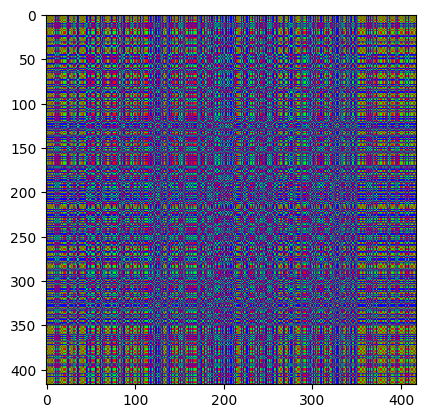

In [16]:
img2 = cv2.imread(f"{data_dir}/images/{dataset}/full/{small_one}.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
pyplot.imshow(img2)

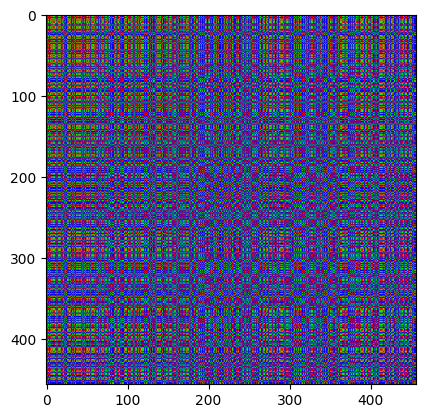

In [17]:
img = cv2.imread(f"{data_dir}/images/{dataset}/full/{big_one}.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pyplot.imshow(img)

{'index': 0, 'img1': 'homo_sapiens_ENSG00000165553.png', 'img2': 'carlito_syrichta_ENSTSYG00000026821.png', 'score': 0.02252453, 'start_col': 0, 'start_line': 0, 'stop_col': 11, 'stop_line': 417, 'max_size': 456}
{'index': 1, 'img1': 'homo_sapiens_ENSG00000165553.png', 'img2': 'carlito_syrichta_ENSTSYG00000026821.png', 'score': 0.029377392, 'start_col': 20, 'start_line': 15, 'stop_col': 31, 'stop_line': 432, 'max_size': 456}
{'index': 2, 'img1': 'homo_sapiens_ENSG00000165553.png', 'img2': 'carlito_syrichta_ENSTSYG00000026821.png', 'score': 0.042102292, 'start_col': 40, 'start_line': 30, 'stop_col': 51, 'stop_line': 447, 'max_size': 456}
{'index': 3, 'img1': 'homo_sapiens_ENSG00000165553.png', 'img2': 'carlito_syrichta_ENSTSYG00000026821.png', 'score': 0.041085124, 'start_col': 45, 'start_line': 30, 'stop_col': 56, 'stop_line': 447, 'max_size': 456}
{'index': 5, 'img1': 'homo_sapiens_ENSG00000165553.png', 'img2': 'carlito_syrichta_ENSTSYG00000026821.png', 'score': 0.07978765, 'start_col

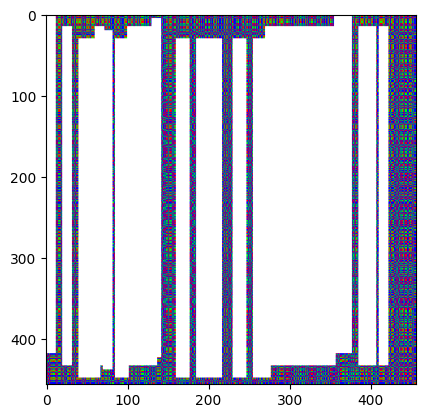

In [18]:
img = cv2.imread(f"{data_dir}/images/{dataset}/full/{big_one}.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in dict_filter_test:
    print(i)
    cv2.rectangle(img, (i["start_col"], i["start_line"]), (i["stop_col"], i["stop_line"]), (255,255,255), -1)
pyplot.imshow(img)

## Try to "align"

In [19]:
seqs = SeqIO.parse(f"{data_dir}/{dataset}.fasta.sanitized", "fasta")
to_align = []
for s in seqs:
    if s.description == big_one:
        big_img = (s.description, s.seq)
        to_align.append(big_img)
    elif s.description == small_one:
        small_img = (s.description, s.seq)
        to_align.append(small_img)
to_align

[('homo_sapiens_ENSG00000165553',
  Seq('ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGCAGTGAGCCGC...TAA')),
 ('carlito_syrichta_ENSTSYG00000026821',
  Seq('CGCGCGCCGCTCTCTCCGCGGGGCTTCCGCGAGGCTTGGCGCCGGAACCAACCC...CCG'))]

In [20]:
alignment = ""
last_col = 0
start_write = 0
stop_write = 0
for i, row in df_filter_test.iterrows():
    if row["start_col"] < last_col:
        gap = 0
    else:
        gap = row["start_col"] - last_col
    stop_write = row["stop_col"]
    alignment += gap * "-"
    alignment += str(small_img[1])[start_write+gap:stop_write]
    last_col = row["stop_col"]
    start_write = stop_write
alignment += (row["max_size"] - len(alignment)) * "-"

In [21]:
alignment

'CGCGCGCCGCT---------GGGCTTCCGCG---------GCCGGAACCAACCCCTAGGGCTGACACCCGGCCAACCCCAC----TGTTCGCCCTGGAGCCCGACCTGCTGCCCCTCTTCCAGTACAACTGTCGCCAGTTC-------------------TCTCCTCCCCTGAGTT---------CATCAGGAAGGTGATGCTTGTGATTGACACC--------------GGAGGACCTGTCCTCA---------TACCTTGCCGGCTTGGGCAGAAAGCACCGGGCAGTGGGTGTGAAGCTCAGCTCCTTCTCGGTGAGCCTACTGTATGCAGAGGCTGTGCTAGGATCTGGGCCGGCCGTCTCTCCAGCCACGC---------GGAGCCCGCTCTCCGGGCCGT----CGGGCCG---------------------------------------'

In [22]:
str(small_img[1])

'CGCGCGCCGCTCTCTCCGCGGGGCTTCCGCGAGGCTTGGCGCCGGAACCAACCCCTAGGGCTGACACCCGGCCAACCCCACAGGCTGTTCGCCCTGGAGCCCGACCTGCTGCCCCTCTTCCAGTACAACTGTCGCCAGTTCTCCAGCCCAGAGGACTGCCTCTCCTCCCCTGAGTTCCTGGACCACATCAGGAAGGTGATGCTTGTGATTGACACCGCGGTGACCAATGTGGAGGACCTGTCCTCACTTGAGGAGTACCTTGCCGGCTTGGGCAGAAAGCACCGGGCAGTGGGTGTGAAGCTCAGCTCCTTCTCGGTGAGCCTACTGTATGCAGAGGCTGTGCTAGGATCTGGGCCGGCCGTCTCTCCAGCCACGCGGGCCGCCTGGAGCCCGCTCTCCGGGCCGTGGTGCGGGCCG'

In [23]:
big_str = str(big_img[1])
big_str

'ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGCAGTGAGCCGCAGCCCGCTGGAGCACGGCACCGTCCTGTTTGCCAGGCTGTTTGCCCTGGAGCCTGACCTGCTGCCCCTCTTCCAGTACAACTGCCGCCAGTTCTCCAGCCCAGAGGACTGTCTCTCCTCGCCTGAGTTCCTGGACCACATCAGGAAGGTGATGCTCGTGATTGATGCTGCAGTGACCAATGTGGAAGACCTGTCCTCACTGGAGGAGTACCTTGCCAGCCTGGGCAGGAAGCACCGGGCAGTGGGTGTGAAGCTCAGCTCCTTCTCGACAGTGGGTGAGTCTCTGCTCTACATGCTGGAGAAGTGTCTGGGCCCTGCCTTCACACCAGCCACACGGGCTGCCTGGAGCCAACTCTACGGGGCCGTAGTGCAGGCCATGAGTCGAGGCTGGGATGGCGAGTAA'

In [24]:
final_align = ""
score = 0
for i, letter in enumerate(alignment):
    if (letter == "-"):
        final_align += letter
    elif (letter == big_str[i]):
        final_align += "*"
        score += 1
    else:
        final_align += letter
final_align

'CGC*C**CG*T---------*GGCT****CG---------*CCGGAACCAA*C*CTAGG****ACA*C****CAACC**AC----TGTTCGCCC*G*AG*CC**C*TGCTG*CC**CTT**AG*A*A*C*GTCG*CAGTT*-------------------T**CCTC*C*TGA*TT---------CAT*AGG*AGGT**T*C*TG**A*T*AC*CC--------------GG*G*ACCTGTC*TCA---------T*CCTTGC*GGCTTGG**AGAAAGCACCG*GCAGT**GT***AAGC*C*GCTC*TT***GG*GAGCCT*C**TA**CAGAGGCTG*GCTAGGATCT*G*CC*GCCG*CTCT**A***ACGC---------GGA*CC*GCT**CCG*G*CGT----****C*G---------------------------------------'

In [25]:
score / len(big_str) * 100  # identity 

22.36842105263158

### With Clustal Multiple Alignment

In [26]:
to_align

[('homo_sapiens_ENSG00000165553',
  Seq('ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGCAGTGAGCCGC...TAA')),
 ('carlito_syrichta_ENSTSYG00000026821',
  Seq('CGCGCGCCGCTCTCTCCGCGGGGCTTCCGCGAGGCTTGGCGCCGGAACCAACCC...CCG'))]

In [27]:
align = AlignIO.read(f"{data_dir}/trees/full/{dataset}/Control with Clustal Omega.fasta", "fasta")
print(align)

Alignment with 15 rows and 456 columns
ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA homo_sapiens_ENSG00000165553
ATGGAGCGCCCAGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA chlorocebus_sabaeus_ENSCSAG00000011845
ATGGAGCGCCCGGAGCCGGAGCTGATCCGGCAGAGCTGGCAAGC...TGA otolemur_garnettii_ENSOGAG00000006194
ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA nomascus_leucogenys_ENSNLEG00000016682
ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TGA prolemur_simus_ENSPSMG00000011006
ATGGAGCCCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA aotus_nancymaae_ENSANAG00000022420
ATGGACCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA gorilla_gorilla_ENSGGOG00000006195
ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA pan_troglodytes_ENSPTRG00000006575
ATGGAGCGCCCAGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA rhinopithecus_roxellana_ENSRROG00000044996
ATGGAGCGCCCAGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA rhinopithecus_bieti_ENSRBIG00000038926
ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGC...TAA pan_paniscus_ENSPPAG00000040520
--

In [28]:
for a in align:
    if a.description == big_one:
        big_str_clustal = str(a.seq)
big_str_clustal

'ATGGAGCGCCCGGAGCCCGAGCTGATCCGGCAGAGCTGGCGGGCAGTGAGCCGCAGCCCGCTGGAGCACGGCACCGTCCTGTTTGCCAGGCTGTTTGCCCTGGAGCCTGACCTGCTGCCCCTCTTCCAGTACAACTGCCGCCAGTTCTCCAGCCCAGAGGACTGTCTCTCCTCGCCTGAGTTCCTGGACCACATCAGGAAGGTGATGCTCGTGATTGATGCTGCAGTGACCAATGTGGAAGACCTGTCCTCACTGGAGGAGTACCTTGCCAGCCTGGGCAGGAAGCACCGGGCAGTGGGTGTGAAGCTCAGCTCCTTCTCGACAGTGGGTGAGTCTCTGCTCTACATGCTGGAGAAGTGTCTGGGCCCTGCCTTCACACCAGCCACACGGGCTGCCTGGAGCCAACTCTACGGGGCCGTAGTGCAGGCCATGAGTCGAGGCTGGGATGGCGAGTAA'

In [29]:
for a in align:
    if a.description == small_one:
        alignment_clustal = str(a.seq)
alignment_clustal

'------CGCGCGCCGCTCTCTCCGCGGGGCTTCCGCGAGGCTTGGCGCCGGAACCAACCCCTAGGGCTGACACCCGGCCAACCCCACAGGCTGTTCGCCCTGGAGCCCGACCTGCTGCCCCTCTTCCAGTACAACTGTCGCCAGTTCTCCAGCCCAGAGGACTGCCTCTCCTCCCCTGAGTTCCTGGACCACATCAGGAAGGTGATGCTTGTGATTGACACCGCGGTGACCAATGTGGAGGACCTGTCCTCACTTGAGGAGTACCTTGCCGGCTTGGGCAGAAAGCACCGGGCAGTGGGTGTGAAGCTCAGCTCCTTCTCGGTGAGCCTACTGTATGCAGAGGCTGTGCTAGG------ATCTGGGCCGGCCGTCTCTCCAGCCACGCGGGCCGCCTGGAGCCCGCTCTCCGGGCCGTGGTGCGGGCCG---------------------------'

[6, 359] [352, 428, 455]


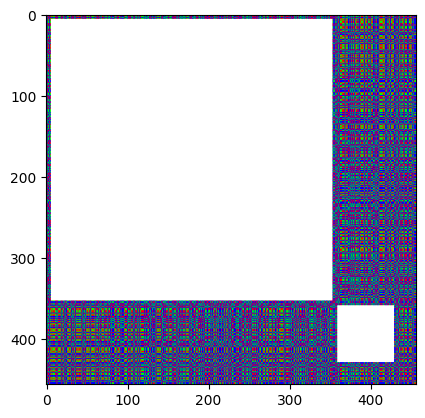

In [30]:
img = cv2.imread(f"{data_dir}/images/{dataset}/full/{big_one}.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
start_col = []
stop_col = []
for i, letter in enumerate(alignment_clustal):
    if (letter != "-") and (len(start_col) == len(stop_col)):
        start_col.append(i)        
    elif (letter == "-") and (len(start_col) > len(stop_col)):
        stop_col.append(i-1)
    elif i == len(alignment_clustal)-1:
        stop_col.append(i)
print(start_col, stop_col)
for j in range(len(start_col)):
    cv2.rectangle(img, (start_col[j], start_col[j]), (stop_col[j], stop_col[j]), (255,255,255), -1)
pyplot.imshow(img)

In [31]:
final_align_clustal = ""
score_clustal = 0
for i, letter in enumerate(alignment_clustal):
    if (letter == "-"):
        final_align_clustal += letter
    elif (letter == big_str_clustal[i]):
        final_align_clustal += "*"
        score_clustal += 1
    else:
        final_align_clustal += letter
final_align_clustal

'------***G**CC**T*TCT*C*CGGG*CTTCC**GA*GCTTGGCGCC*GAA*CAA**C**A*G**TGACAC***G**AACCCCA*********C***********C*****************************T**************************C********C***********************************T********CA*C**G**************G**************T***************G**T*******A***************************************GTGAGCCTACT**A*GCAGAGGCTG****A*G------ATCT**G**G***G**T*T********G*****C**********CG****C****C*GTGGTGCGG*C*G---------------------------'

In [32]:
score_clustal / len(big_str_clustal) * 100  # identity 

65.78947368421053

### Comparing with Clustal

In [33]:
final_align_compare = ""
score_compare = 0
for i, letter in enumerate(alignment):
    if (letter == alignment_clustal[i]):
        final_align_compare += "*"
        score_compare += 1
    else:
        final_align_compare += letter
final_align_compare

'CGCGCG*CGCT---------GGGCTTCC**G---------GCC**AA**AACC**T*GGG**GACA*CCGGC*AACC***C----TGTTCGCCC*G*AG*CC**C*TGCTG*CC**CTT**AG*A*A*C*GTCG*CAGTT*-------------------T**C*TC*C*TGAGTT---------CAT*AGG*AGGT**T*C*TG**A***AC*CC--------------GG*G*ACCT*TC*TCA---------T*CCTTGC*GGCTTG***AGAAAGCACCG*GCAGT**GT***AAGC*C*GCTC*TT***GG*GAGCC*ACTGTATGCAG*G**T*T*CTA*GATCT**GCCGGCCGTCTCT**A***ACGC---------G*A*CC*GCT**CCG*G***T----*******------------***************************'

In [34]:
score_compare / len(alignment_clustal) * 100

28.50877192982456